In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'/Users/kimjuwon/Github/KDC-FastCampas_Machine_Learning_with_Python/[KDC]FastCampus_MachineLearning_Python'

In [3]:
# 데이터 불러오기 - price 변수를 가지고 예측하고 싶음 명목형 변수가 존재 
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)


1436 37


## 범주형 변수를 이진형 변수로 변환

In [5]:
## 가변수 생성
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [6]:
#대입 Factor 수 - 1
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [7]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
# 인덱스 슬라이싱 후 (binary = 1) 
p_idx = np.array(corolla.Fuel_Type=="Petrol")
d_idx = np.array(corolla.Fuel_Type=="Diesel")
c_idx = np.array(corolla.Fuel_Type=="CNG")

In [9]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [10]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [11]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [12]:
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Disel': dummy_d, 'CNG': dummy_c})

In [13]:
Fuel

,Petrol,Disel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [14]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis = 1, inplace = False)
mlr_data = pd.concat((corolla_, Fuel),1)
mlr_data.head()

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_28086/617809802.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  mlr_data = pd.concat((corolla_, Fuel),1)


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [15]:
# bias 추가
# 변수를 중복으로 덮어 씌울 수 있으므로 이름을 반드시 다르게 해둘것
mlr_data2 = sm.add_constant(mlr_data,has_constant="add")
mlr_data2.head()

/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [16]:
feature_columns = list(mlr_data2.columns.difference(['Price']))

X = mlr_data2[feature_columns]
y = mlr_data2.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [17]:
# Train the MLR / 회귀모델적합
full_model=sm.OLS(train_y, train_x)
fitted_full_model=full_model.fit()

In [18]:
## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     311.0
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:09:49   Log-Likelihood:                -8448.1
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     971   BIC:                         1.713e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -382.4692    137.361     -2.784      0.005    -652.027    -112.911
Age_08_04         -115.5707      4.049    -28.541      0.000    -123.517    -107.624
Airbag_1           100.0380    257.181      0.389      0.697    -404.657     604.733
Airbag_2           -12.6260    138.866     -0.091      0.928    -285.139     259.887
Airco              215.6732     96.753      2.229      0.026      25.804     405.542
Automatic          524.5007    163.370      3.211      0.001     203.902     845.100
Automatic_airco   2135.0886    194.839     10.958      0.000    1752.735    2517.443
BOVAG_Guarantee    369.6393    135.604      2.726      0.007     103.528     635.750
Backseat_Divider  -215.5583    138.009     -1.562      0.119    -486.390      55.273
Boardcomputer     -123.3545    124.506     -0.991      0.322    -367.687     120.978
CD_Player          205.9984    105.047      1.961      0.050      -0.147     412.144
CNG              -1997.6635    292.576     -6.828      0.000   -2571.817   -1423.510
Central_Lock       -55.4318    160.736     -0.345      0.730    -370.862     259.998
Cylinders           -0.0271      0.003    -10.766      0.000      -0.032      -0.022
Disel             2250.5640    338.695      6.645      0.000    1585.906    2915.222
Doors              127.5397     41.979      3.038      0.002      45.159     209.920
Gears             -234.0863    247.459     -0.946      0.344    -719.702     251.529
Guarantee_Period    80.7525     15.485      5.215      0.000      50.364     111.141
HP                  56.9802      6.395      8.911      0.000      44.432      69.529
KM                  -0.0178      0.001    -13.387      0.000      -0.020      -0.015
Met_Color          -54.1982     79.745     -0.680      0.497    -210.691     102.295
Metallic_Rim       243.8448     99.379      2.454      0.014      48.822     438.867
Mfg_Month          -94.1197     10.834     -8.687      0.000    -115.381     -72.859
Mfg_Year             3.9106      0.974      4.014      0.000       1.999       5.822
Mfr_Guarantee      203.9172     77.903      2.618      0.009      51.039     356.795
Mistlamps           99.5575    118.215      0.842      0.400    -132.429     331.545
Petrol            -252.9072    262.528     -0.963      0.336    -768.094     262.279
Power_Steering     385.5909    318.966      1.209      0.227    -240.351    1011.533
Powered_Windows    371.9785    158.968      2.340      0.019      60.018     683.939
Quarterly_Tax       10.3265      2.029      5.088      0.000       6.344      14.309
Radio              316.8868    656.489      0.483      0.629    -971.413    1605.187
Radio_cassette    -370.3788    656.220     -0.564      0.573   -1658.151     917.393
Sport_Model        451.2056     92.072      4.901      0.000     270.523     631.889
Tow_Bar           -110.

## VIF를 통한 다중공선성 확인 

In [19]:
#유이하고, 다중공선성이 높지만 중요한 영향을 끼치고 있다고 볼 수 있다면 지우기 애매한 감이 있음 
# radio p-value가 높아 지워보고 다시 분석 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data2.values, i) for i in range(mlr_data2.shape[1])]
vif["features"] = mlr_data2.columns
vif

/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


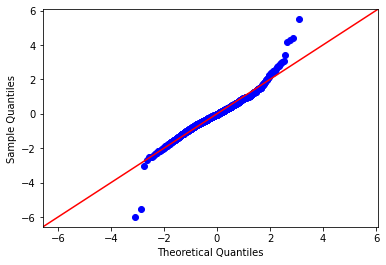

In [20]:
# 학습데이터의 잔차 확인
# 꼬리 부분이 약간의 엇나갈 수 있음
# 현실 데이터는 항상 맞지 않는다는 점을 인지하자 

res=fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

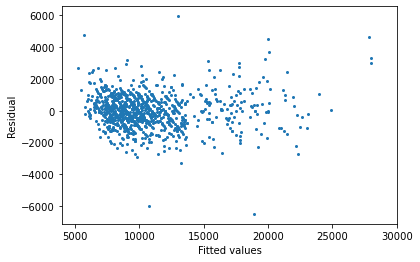

In [21]:
# residual pattern 확인
# 잔차가 균등하게 나와있구나
pred_y=fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [26]:
## 검증 데이터에 대한 예측 
pred_y2 = fitted_full_model.predict(test_x)

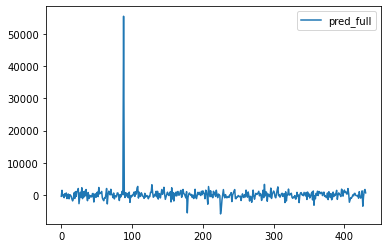

In [34]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

In [37]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

8376030.352085343

# 변수선택법

In [38]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc653e263a0>, 'AIC': 19129.783555796}


In [39]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc632f23c70>,
 'AIC': 16964.158384168502}

In [40]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
# 가장 좋은 모델을 AIC기준으로 선택 
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.666269063949585 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17566.045549
Name: 211, dtype: object


In [41]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Disel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'cons

In [42]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.0499420166015625 seconds.
Processed  630 models on 2 predictors in 0.4866349697113037 seconds.
Processed  7140 models on 3 predictors in 6.380424976348877 seconds.
Total elapsed time: 6.975163221359253 seconds.


In [43]:
models

,AIC,model
1,17818.034217,<statsmodels.regression.linear_model.Regressio...
2,17566.045549,<statsmodels.regression.linear_model.Regressio...
3,17339.515413,<statsmodels.regression.linear_model.Regressio...


In [44]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2170.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:52:41   Log-Likelihood:                -8665.8
No. Observations:                1005   AIC:                         1.734e+04
Df Residuals:                    1001   BIC:                         1.736e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0227      0.001    -16.627      0.000      -0.025      -0.020
Mfg_Year    1499.1227     37.098     40.410      0.000    1426.324    1571.922
Weight        19.6480      0.895     21.961      0.000      17.892      21.404
const      -3.006e+06   7.37e+04    -40.768      0.000   -3.15e+06   -2.86e+06
==============================================================================
Omnibus:                      197.127   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2973.387
Skew:                          -0.426   Prob(JB):                         0.00
Kurtosis:                      11.383   Cond. No.                     1.36e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91358
full model AIC:  16964.15838
full model MSE:  13574886.52083
selected model Rsquared:  0.86672
selected model AIC:  17339.51541
selected model MSE:  13574886.52083


Text(0, 0.5, 'BIC')

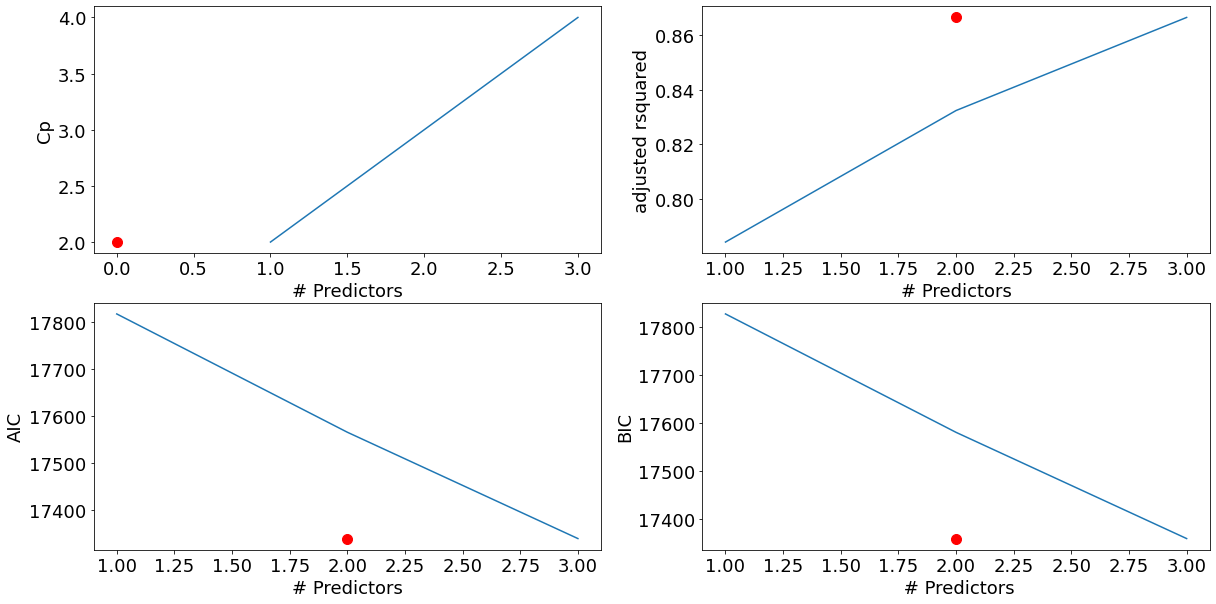

In [46]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [47]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [48]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [49]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.05383610725402832
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc653e889a0>
Processed  35 models on 2 predictors in 0.036011695861816406
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc653e88670>
Processed  34 models on 3 predictors in 0.029548168182373047
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc653dfa610>
Processed  33 models on 4 predictors in 0.032620906829833984
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc6536c7cd0>
Processed  32 models on 5 predictors in 0.03525495529174805
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM

In [50]:
Forward_best_model.aic

16949.879820786347

In [51]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     429.9
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:56:05   Log-Likelihood:                -8449.9
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     980   BIC:                         1.707e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1122.2035    129.184      8.687      0.000     868.695    1375.712
Automatic_airco   2209.8732    182.596     12.103      0.000    1851.549    2568.197
Weight               9.3384      1.221      7.646      0.000       6.942      11.735
KM                  -0.0180      0.001    -13.631      0.000      -0.021      -0.015
Powered_Windows    337.7056     88.698      3.807      0.000     163.646     511.765
HP                  54.9455      6.189      8.877      0.000      42.799      67.092
Quarterly_Tax       10.4131      1.983      5.251      0.000       6.522      14.305
Guarantee_Period    82.2225     14.985      5.487      0.000      52.816     111.629
Sport_Model        438.3552     86.748      5.053      0.000     268.121     608.589
CNG              -4.511e+04   4988.029     -9.044      0.000   -5.49e+04   -3.53e+04
cc                  -3.7067      0.575     -6.452      0.000      -4.834      -2.579
Petrol           -4.335e+04   4990.587     -8.687      0.000   -5.31e+04   -3.36e+04
BOVAG_Guarantee    368.2675    133.944      2.749      0.006     105.417     631.118
Airco              230.1738     92.377      2.492      0.013      48.894     411.453
ABS               -370.3507    105.770     -3.501      0.000    -577.911    -162.790
Automatic          527.3063    162.426      3.246      0.001     208.564     846.049
Doors              132.2446     41.407      3.194      0.001      50.987     213.502
Metallic_Rim       259.3007     92.933      2.790      0.005      76.929     441.672
Mfr_Guarantee      195.3512     76.578      2.551      0.011      45.075     345.627
CD_Player          198.1669     98.897      2.004      0.045       4.092     392.242
Age_08_04          -19.2824     10.748     -1.794      0.073     -40.374       1.809
Tow_Bar           -134.2891     80.822     -1.662      0.097    -292.894      24.316
Backseat_Divider  -211.1479    124.223     -1.700      0.089    -454.922      32.627
Power_Steering     438.5160    270.233      1.623      0.105     -91.786     968.818
Disel            -4.097e+04   4976.263     -8.233      0.000   -5.07e+04   -3.12e+04
Cylinders        -5.177e+05   5.97e+04     -8.670      0.000   -6.35e+05   -4.01e+05
const            -1.294e+05   1.49e+04     -8.670      0.000   -1.59e+05      -1e+05
==============================================================================
Omnibus:                       98.277   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.123
Skew:                           0.145   Prob(JB):                    1.62e-134
Kurtosis:                       6.825   Cond. No.                     1.14e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

# 후진소거법

In [52]:
######## 후진소거법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [53]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [54]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.282869815826416
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Disel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc64138c4c0>
Processed  35 models on 34 predictors in 0.2418687343597412
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Disel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_

In [55]:
Backward_best_model.aic

16949.879820786402

# 단계적 선택법

In [56]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [57]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.04689788818359375
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc6316045e0>
forward
Processed  1 models on 0 predictors in 0.001714944839477539
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc653e2f100>
Processed  35 models on 2 predictors in 0.03569602966308594
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc64138c9d0>
forward
Processed  2 models on 1 predictors in 0.002023935317993164
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc630fd1280>
Processed  34 models on 3 predictors in 0.02987194061279297
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResu

Processed  17 models on 16 predictors in 0.06078505516052246
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'CNG', 'cc', 'Petrol', 'BOVAG_Guarantee', 'ABS', 'Automatic', 'Doors', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc64138c3d0>
Processed  19 models on 18 predictors in 0.06664395332336426
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'CNG', 'cc', 'Petrol', 'BOVAG_Guarantee', 'Airco', 'ABS', 'Automatic', 'Doors', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc653e2fbe0>
forward
Processed  18 models on 17 predictors in 0.06180405616760254
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model'

Processed  10 models on 27 predictors in 0.0634613037109375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'CNG', 'cc', 'Petrol', 'BOVAG_Guarantee', 'Airco', 'ABS', 'Automatic', 'Doors', 'Metallic_Rim', 'Mfr_Guarantee', 'CD_Player', 'Age_08_04', 'Tow_Bar', 'Backseat_Divider', 'Power_Steering', 'Disel', 'Cylinders', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc5f012c0a0>
forward
Processed  27 models on 26 predictors in 0.14915204048156738
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'CNG', 'cc', 'Petrol', 'BOVAG_Guarantee', 'Airco', 'ABS', 'Automatic', 'Doors', 'Metallic_Rim', 'Mfr_Guarantee', 'CD_Player', 'Age_08_04', 'Tow_Bar', 'Backseat_Divider', 'Power_Steering', 'Disel', 'Cylinders', 'const']  AIC: <statsmodels.regression.line

Processed  27 models on 26 predictors in 0.1569979190826416
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'CNG', 'cc', 'Petrol', 'BOVAG_Guarantee', 'Airco', 'ABS', 'Automatic', 'Doors', 'Metallic_Rim', 'Mfr_Guarantee', 'CD_Player', 'Age_08_04', 'Tow_Bar', 'Backseat_Divider', 'Power_Steering', 'Disel', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc653e3cfd0>
backward
Total elapsed time: 4.826020240783691 seconds.


In [58]:
Stepwise_best_model.aic

16949.879820786347

# 성능평가 

In [59]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(27,) (26,) (27,)


In [60]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [61]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [62]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [63]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD      BACKWARD        STEPWISE
MSE   8376030.352085  7882990.780886  7882990.7809  7882990.780886
RMSE     2894.137238      2807.66643    2807.66643      2807.66643
MAE       945.245638      939.634941    939.634941      939.634941
MAPE        9.284395        9.243914      9.243914        9.243914


In [64]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
27
26
27
